In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed(42)
X=np.random.uniform(-3, 3, 100).reshape(-1, 1)
y=0.5*X**3-X**2+2*X+np.random.randn(100, 1)*3
y=y.ravel()

In [3]:
poly=PolynomialFeatures(degree=5)
X_poly=poly.fit_transform(X)

In [5]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly, y)

elastic=ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000)
elastic.fit(X_poly, y)

,alpha,0.5
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,10000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [10]:
X_plot=np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly=poly.transform(X_plot)

y_plot_lin=lin_reg.predict(X_plot_poly)
y_plot_elastic=elastic.predict(X_plot_poly)

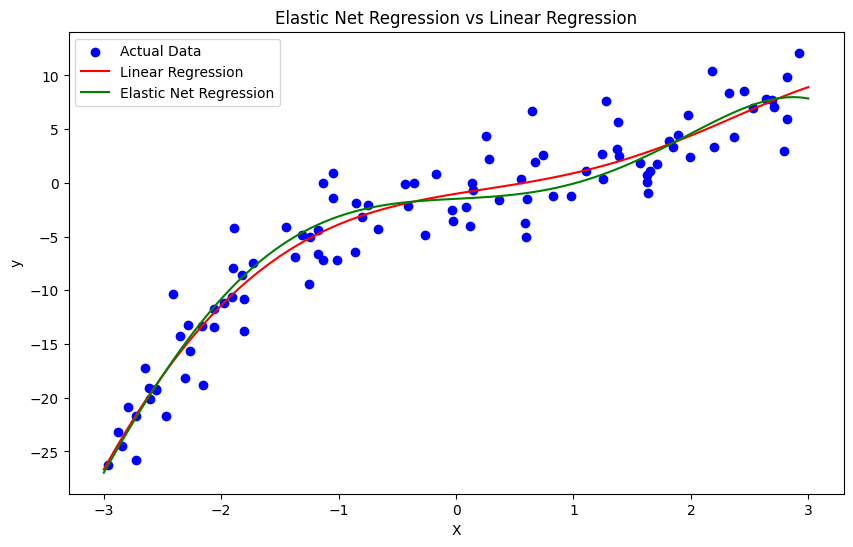

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_plot, y_plot_lin, color='red', label='Linear Regression')
plt.plot(X_plot, y_plot_elastic, color='green', label='Elastic Net Regression')
plt.legend()
plt.title("Elastic Net Regression vs Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [12]:
y_pred_lin = lin_reg.predict(X_poly)
y_pred_elastic = elastic.predict(X_poly)

print("Linear Regression MSE:", mean_squared_error(y, y_pred_lin))
print("Elastic Net MSE:", mean_squared_error(y, y_pred_elastic))
print("Linear Regression R²:", r2_score(y, y_pred_lin))
print("Elastic Net R²:", r2_score(y, y_pred_elastic))

Linear Regression MSE: 6.853266979414511
Elastic Net MSE: 7.2111360567681615
Linear Regression R²: 0.9176467596333139
Elastic Net R²: 0.9133463758549444
